Original dimensions: 5583 3496
New dimensions: (300, 187, 3)


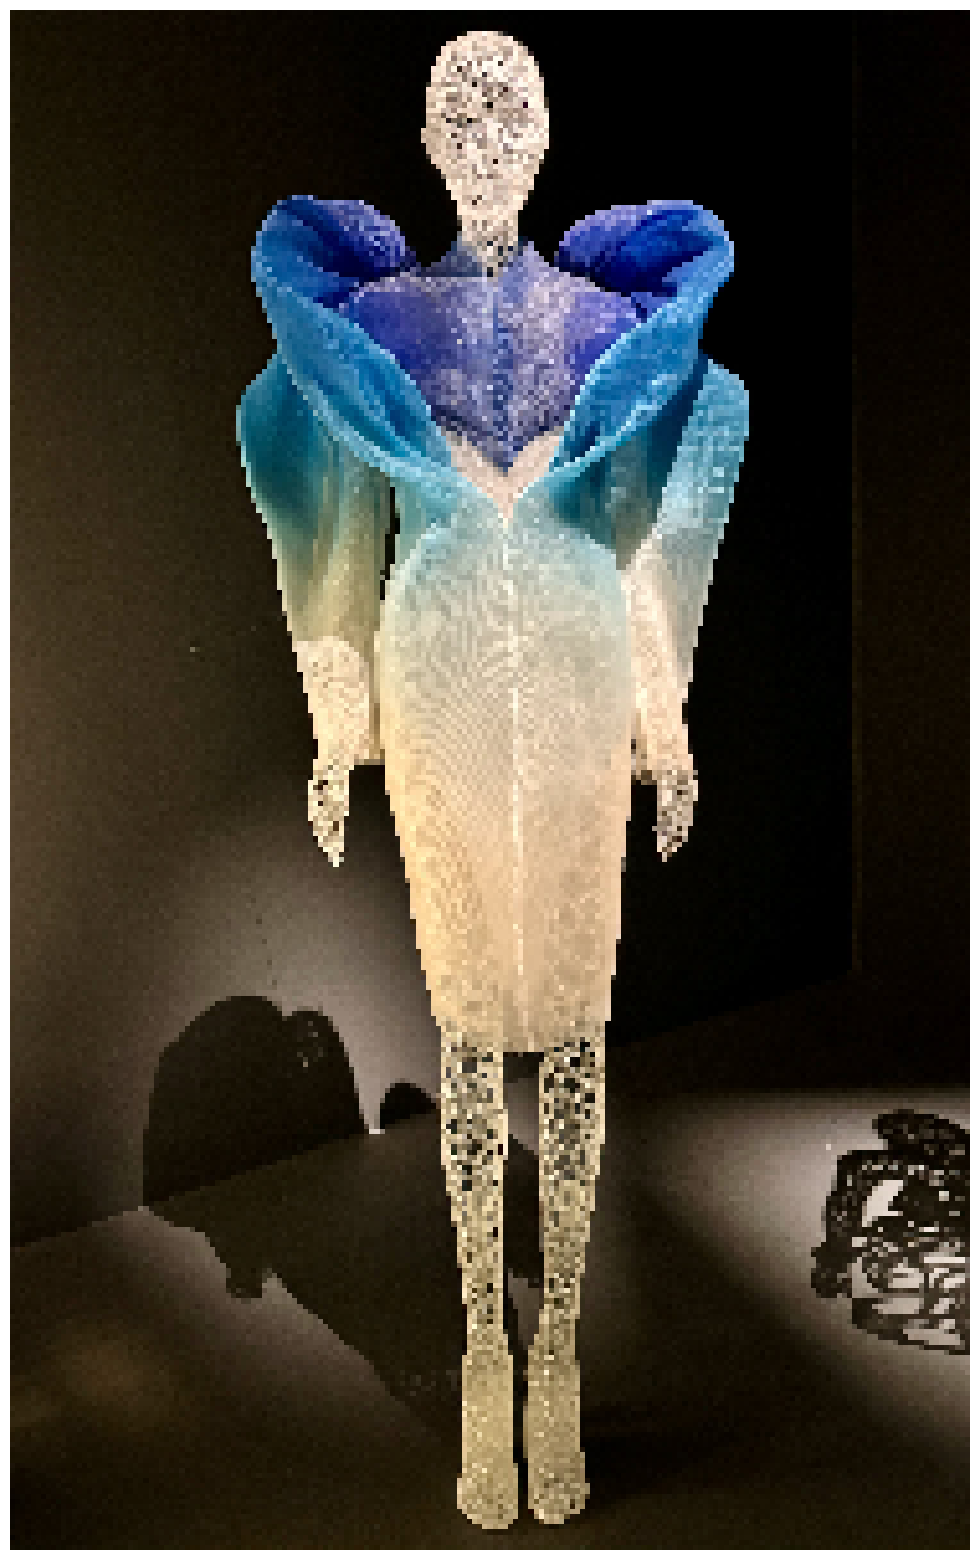

In [45]:
# Before beginning, when creating a new virtual environment:
# Activate cv_project virtual environment
# Install opencv, numpy, jupyter, and matplotlib packages
# Install ipykernel, and run:
# python -m ipykernel install --user --name="CV" --display-name="Computer Vision Project"
# Open Jupyter

import numpy as np
import sys
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def change_size(path, max_dim):
    img = cv2.imread(path)
    if img is None:
        raise ValueError("Image not found or could not be loaded")

    height, width = img.shape[:2]
    print('Original dimensions:', height, width)
    
    scale = min(max_dim/width, max_dim/height)
    if scale < 1:
        new_width = int(width*scale)
        new_height = int(height*scale)
        img = cv2.resize(img, (new_width, new_height))
        print('New dimensions:', img.shape)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return(img)

image = change_size('Iris_Van_Herpen_Sculpting_the_Senses_exhibition_at_QGOMA,_2024,_09.jpg', 300)
image_rgb = image
image_cmyk = image

#print("Before display:", img.shape)  # Check final image shape
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
ax.imshow(image_rgb)
ax.set_axis_off()
#plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.show()

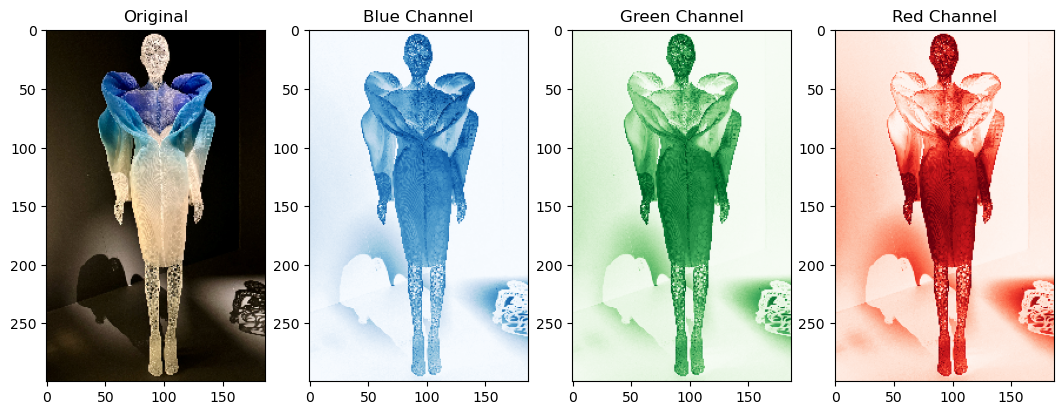

In [46]:
# Now splitting RGB instead of BGR
R, G, B = cv2.split(image_rgb)  # Note the order change here
plt.figure(figsize=(13,5))

plt.subplot(141)
plt.imshow(image_rgb)  # No need for cvtColor since it's already RGB
plt.title('Original')

plt.subplot(142)
plt.imshow(B, cmap='Blues')
plt.title('Blue Channel')

plt.subplot(143)
plt.imshow(G, cmap='Greens')
plt.title('Green Channel')

plt.subplot(144)
plt.imshow(R, cmap='Reds')
plt.title('Red Channel')

plt.show()

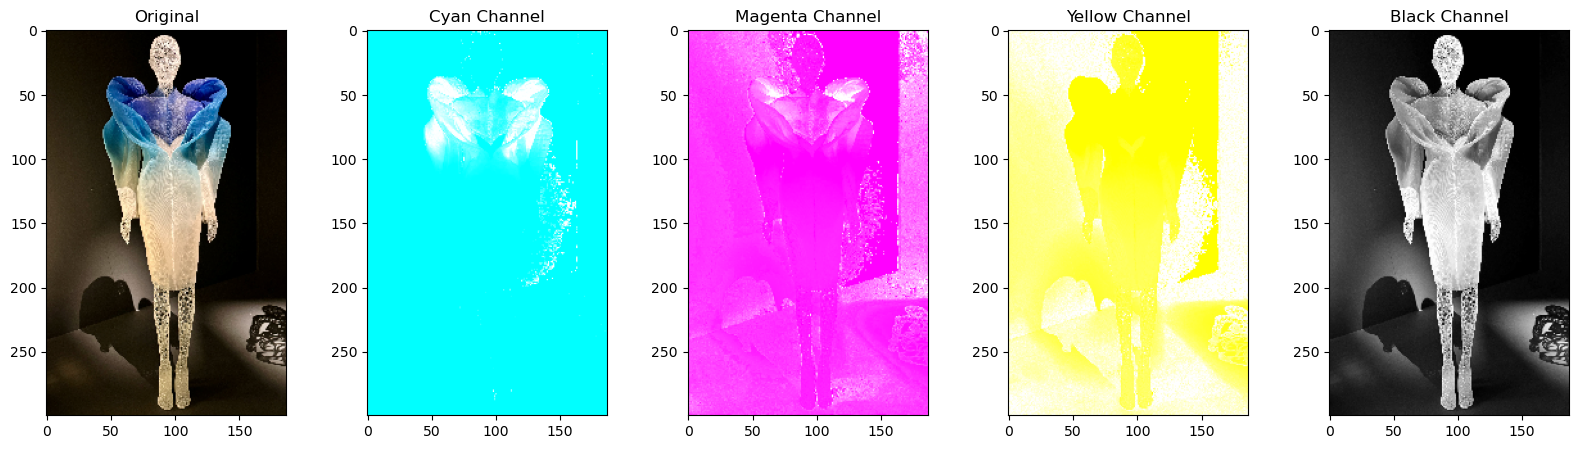

In [47]:
# Changing to CMYK analysis

from matplotlib.colors import LinearSegmentedColormap

# First ensure original image is in RGB
#image_cmyk = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert RGB values to float between 0-1
rgb_float = image_cmyk.astype(float) / 255.0

# Extract RGB channels
r, g, b = cv2.split(rgb_float)

# Calculate K (black)
k = 1 - np.maximum.reduce([r, g, b])

# Calculate C, M, Y
c = np.zeros_like(k)
m = np.zeros_like(k)
y = np.zeros_like(k)

# Avoid division by zero
valid = k != 1
c[valid] = (1 - r[valid] - k[valid]) / (1 - k[valid])
m[valid] = (1 - g[valid] - k[valid]) / (1 - k[valid])
y[valid] = (1 - b[valid] - k[valid]) / (1 - k[valid])

# Create inverted custom colormaps
# Now going from the pure color to white (inverted)
cyan_colors = [(0,1,1), (1,1,1)]  # cyan to white
cyan_cmap = LinearSegmentedColormap.from_list('custom_cyan', cyan_colors)

magenta_colors = [(1,0,1), (1,1,1)]  # magenta to white
magenta_cmap = LinearSegmentedColormap.from_list('custom_magenta', magenta_colors)

yellow_colors = [(1,1,0), (1,1,1)]  # yellow to white
yellow_cmap = LinearSegmentedColormap.from_list('custom_yellow', yellow_colors)

plt.figure(figsize=(20,5))

plt.subplot(151)
plt.imshow(image_cmyk)  # Use RGB version
plt.title('Original')

plt.subplot(152)
plt.imshow(c, cmap=cyan_cmap)
plt.title('Cyan Channel')

plt.subplot(153)
plt.imshow(m, cmap=magenta_cmap)
plt.title('Magenta Channel')

plt.subplot(154)
plt.imshow(y, cmap=yellow_cmap)
plt.title('Yellow Channel')

plt.subplot(155)
plt.imshow(k, cmap='gray_r')  # Inverted grayscale for black
plt.title('Black Channel')

plt.show()
